#### Libraries

In [3]:
from vg_data_types import *
import json
import pandas as pd

# Predicting Video Game Sales
##### (this project is on hold for now)
### Goals: Predict video game sales/ranking with their over art or desciption
### Data sets and Original Source: vgchartz.com
### Approach: Use GCP Auo-ML to extract properties and components of images/text.

# The Data (5 datasets total)

## -Raw Video Game Data
#### Video game cover art

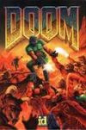

In [44]:
i = game_img('test')
i.load('imgs/img_Doom_-_PC.bmp', pull_file=True)
i.data

#### Video game description/bio

In [35]:
t = game_txt('test')
t.load('txts/txt_Doom_-_PC.json', True)
t.data

'You\'re a marine, one of Earth\'s toughest, hardened in   \ncombat and trained for action. Three years ago you assaulted   \na superior officer for ordering his soldiers to fire upon   \ncivilians. He and his body cast were shipped to Pearl   \nHarbor, while you were transferred to Mars, home of the   \nUnion Aerospace Corporation. \nThe UAC is a multi-planetary conglomerate with radioactive   \nwaste facilities on Mars and its two moons, Phobos and   \nDeimos. With no action for fifty million miles, your day   \nconsisted of suckin\' dust and watchin\' restricted flicks in   \nthe rec room. \nFor the last four years the military, UAC\'s biggest   \nsupplier, has used the remote facilities on Phobos and   \nDeimos to conduct various secret projects, including   \nresearch on inter-dimensional space travel. So far they have   \nbeen able to open gateways between Phobos and Deimos,   \nthrowing a few gadgets into one and watching them come out   \nthe other. Recently however, the Gatewa

#### Video game general information

In [5]:
#stored as DF
df = pd.read_csv('ALL_GAME_DATA.csv')

In [37]:
df[df.game_name=='Doom_-_PC']

,game_name,console,critic_score,date,developer,game_url,img_loc,img_url,pos,publisher,sales,shipped,txt_loc,user_score,vg_score
13096,Doom_-_PC,PC,8.0,10th Dec 93,id Software,http://www.vgchartz.com//games/game.php?id=623...,imgs/img_Doom_-_PC.bmp,http://www.vgchartz.com//games/boxart/7524377c...,14547,id Software,0.04m,NaN,txts/txt_Doom_-_PC.json,NaN,NaN


In [38]:
#also stored as json
with open('ALL_GAME_DATA.json','r') as f:
    js = json.load(f)

In [39]:
js['Doom_-_PC']

{'date': '10th Dec 93',
 'user_score': 'N/A',
 'critic_score': '8.0',
 'developer': 'id Software',
 'img_loc': 'imgs/img_Doom_-_PC.bmp',
 'vg_score': 'N/A',
 'sales': '0.04m',
 'console': 'PC',
 'game_url': 'http://www.vgchartz.com//games/game.php?id=6232&region=All',
 'shipped': 'N/A',
 'img_url': 'http://www.vgchartz.com//games/boxart/7524377ccc.jpg',
 'publisher': 'id Software',
 'pos': '14547',
 'txt_loc': 'txts/txt_Doom_-_PC.json'}

## -GCP Auto-ML Vision and Text processed Data
### This part needs to be re run

In [51]:
#only 2% of images succesfully went through Automl
with open('GCP_IMG_DATA.json','r') as f:
    data = json.load(f)
c = 0
for k,v in data.items():
    if v['properties'] or v['labels']:
        c+=1
print(c/len(data))

0.028778504507689588


### Same for text data

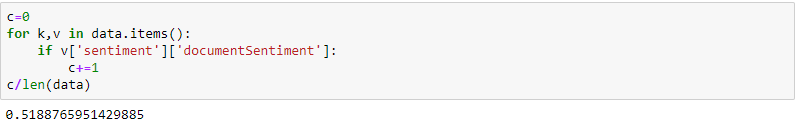

##### Ran all Python scripts calling GCP APIs on a Compute Engine pulling data from Bucket
#### Example of calling the Auto-ML vision property detection API

#### Example of calling the Auto-ML NLP Sentiment API

#https://cloud.google.com/natural-language/docs/analyzing-sentiment#language-sentiment-string-python
from google.protobuf.json_format import MessageToJson
LANGUAGE_CLIENT = language_v1.LanguageServiceClient()
json.loads(MessageToJson(LANGUAGE_CLIENT.analyze_sentiment({"type": enums.Document.Type.PLAIN_TEXT,
                                                "language": 'en',
                                                "content":desc_as_str},
                                                encoding_type=enums.EncodingType.UTF8)))

#### Video game image data post-processing

In [53]:
with open('GCP_IMG_DATA.json','r') as f:
    data = json.load(f)
for k,v in data.items():
    if v['properties'] and v['labels']:
        print(k,v)
        break
data = None

TigerWoodsPGATour2000_-_GB {'properties': {'dominantColors': {'colors': [{'score': 0.12315764278173447, 'color': {'green': 32.0, 'blue': 61.0, 'red': 156.0}, 'pixelFraction': 0.013981853611767292}, {'score': 0.11934588849544525, 'color': {'green': 167.0, 'blue': 96.0, 'red': 148.0}, 'pixelFraction': 0.03108731284737587}, {'score': 0.061296574771404266, 'color': {'green': 18.0, 'blue': 17.0, 'red': 20.0}, 'pixelFraction': 0.12449799478054047}, {'score': 0.05120735615491867, 'color': {'green': 156.0, 'blue': 153.0, 'red': 166.0}, 'pixelFraction': 0.03792949393391609}, {'score': 0.025584978982806206, 'color': {'green': 55.0, 'blue': 73.0, 'red': 134.0}, 'pixelFraction': 0.00401606410741806}, {'score': 0.01994801126420498, 'color': {'green': 19.0, 'blue': 35.0, 'red': 102.0}, 'pixelFraction': 0.00401606410741806}, {'score': 0.07207019627094269, 'color': {'green': 198.0, 'blue': 125.0, 'red': 182.0}, 'pixelFraction': 0.03867321088910103}, {'score': 0.04554617032408714, 'color': {'green': 11

#### Video game description data post-processing (using screenshot)

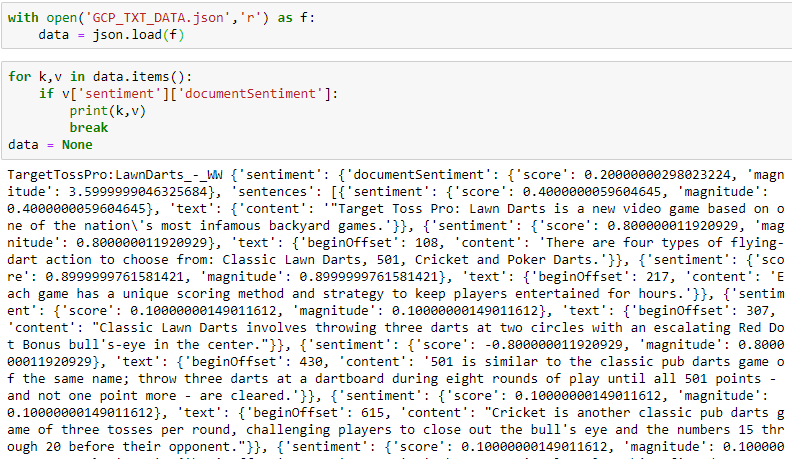

In [54]:
for col in df.columns:
    print(col, df[col].isna().sum()/len(df))

game_name 0.0
console 0.0
critic_score 0.884974368039597
date 0.051228566377938836
developer 0.0003005126392080608
game_url 0.0
img_loc 0.0
img_url 0.0
pos 0.0
publisher 0.0
sales 0.6591656354958458
shipped 0.9651405338518649
txt_loc 0.0
user_score 0.9935831712922043
vg_score 0.9843379883330388


### Update, I am changing the direction of this project given the data Auto-ML outputs and inherit null/mesiness of the description and text data. Will update this repo as I plan further